# The combined Data Collection and EDA for the water project.
Karlee Radford <br>
Jamira Virk <br>
Cameron Tinney <br>
Ahsan Jamil

## Importing Packages

In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from numpy import interp
import pandas as pd
import seaborn as sns


#from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score, learning_curve
#from sklearn.preprocessing import StandardScaler
#from sklearn.linear_model import Perceptron, LogisticRegression
#from sklearn.metrics import accuracy_score
#from sklearn.svm import SVC
#from sklearn.pipeline import make_pipeline
#from sklearn.decomposition import PCA
#from sklearn.neighbors import KNeighborsClassifier as knn
# from sklearn.model_selection import learning_curve
#from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
# from sklearn.metrics import precision_score, recall_score, f1_score
# from sklearn.metrics import roc_curve, auc
# from sklearn.impute import SimpleImputer
# from sklearn.model_selection import GridSearchCV, cross_val_score

## Initial Training and Validation Dataset
water_potability.csv <br>
Jamira Virk wrote the code for the EDA on this dataset.

In [2]:
# water dataset practice for project
water = pd.read_csv('water_potability.csv')
# water.head(10)
water.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1


In [3]:
# stage 3:
# collect large datasets
# do analysis for the data: statistics about the data, plotting information
water.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [4]:
len(water)

3276

In [5]:
water.index

RangeIndex(start=0, stop=3276, step=1)

In [6]:
water.shape

(3276, 10)

In [7]:
water.count()

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability         3276
dtype: int64

In [8]:
water.sample(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
1399,5.202672,195.329689,23051.441857,6.959567,245.728949,473.548484,11.659196,49.522330,3.927981,0
414,5.596628,177.213792,17925.352120,8.435470,303.734166,552.308706,10.339986,57.820611,5.235111,0
1320,6.967271,218.792793,33933.709852,8.977180,360.996941,438.809155,18.633065,71.919217,3.272471,0
1919,8.458797,241.768340,29317.142440,5.783275,313.885548,328.579429,18.296001,84.510985,3.827431,1
3103,5.967274,187.085084,30846.585474,7.281106,339.063715,323.962695,12.651854,72.273590,3.914544,0


In [9]:
water['ph']

0            NaN
1       3.716080
2       8.099124
3       8.316766
4       9.092223
          ...   
3271    4.668102
3272    7.808856
3273    9.419510
3274    5.126763
3275    7.874671
Name: ph, Length: 3276, dtype: float64

In [10]:
water.nunique()

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64

In [11]:
water.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [12]:
# replace NaN values with mean
# imp = SimpleImputer(missing_values=np.nan, strategy='mean')
# imp = imp.fit(water.values)
# new_water = imp.transform(water.values)
# new_water

In [13]:
# replace NaN values with mean
new_water = water.fillna(water.mean())
new_water

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


In [14]:
# print a random sample
new_water.sample(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
2270,6.020654,197.469090,10529.310299,5.305352,416.495213,412.011733,9.909315,59.167002,5.217131,0
382,5.772718,213.363545,26124.931415,8.630719,273.279448,465.559286,8.006208,59.964334,6.494249,1
1253,7.080795,196.432007,18128.908291,8.008077,323.552138,313.361870,18.600728,67.964376,3.502082,0
2814,7.080795,256.936378,13766.330789,5.083866,290.311034,384.906516,17.731523,58.354856,3.979297,1
1339,7.080795,214.972435,36112.134634,7.094066,333.775777,414.101567,15.874564,71.631818,2.432507,0


In [15]:
new_water.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [16]:
# water[['Sulfate', 'Hardness', 'Conductivity']].plot.box(grid=True)

In [17]:
# correlation matrix
corr_mat = new_water[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
                      'Organic_carbon', 'Trihalomethanes','Turbidity']].corr()
corr_mat.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\Karlee\AppData\Local\Temp\ipykernel_16708\3232442200.py:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr_mat.style.background_gradient(cmap='coolwarm').set_precision(2)


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
ph,1.00,0.08,-0.08,-0.03,0.01,0.02,0.04,0.00,-0.04
Hardness,0.08,1.00,-0.05,-0.03,-0.09,-0.02,0.00,-0.01,-0.01
Solids,-0.08,-0.05,1.00,-0.07,-0.15,0.01,0.01,-0.01,0.02
Chloramines,-0.03,-0.03,-0.07,1.00,0.02,-0.02,-0.01,0.02,0.00
Sulfate,0.01,-0.09,-0.15,0.02,1.00,-0.01,0.03,-0.03,-0.01
Conductivity,0.02,-0.02,0.01,-0.02,-0.01,1.00,0.02,0.00,0.01
Organic_carbon,0.04,0.00,0.01,-0.01,0.03,0.02,1.00,-0.01,-0.03
Trihalomethanes,0.00,-0.01,-0.01,0.02,-0.03,0.00,-0.01,1.00,-0.02
Turbidity,-0.04,-0.01,0.02,0.00,-0.01,0.01,-0.03,-0.02,1.00


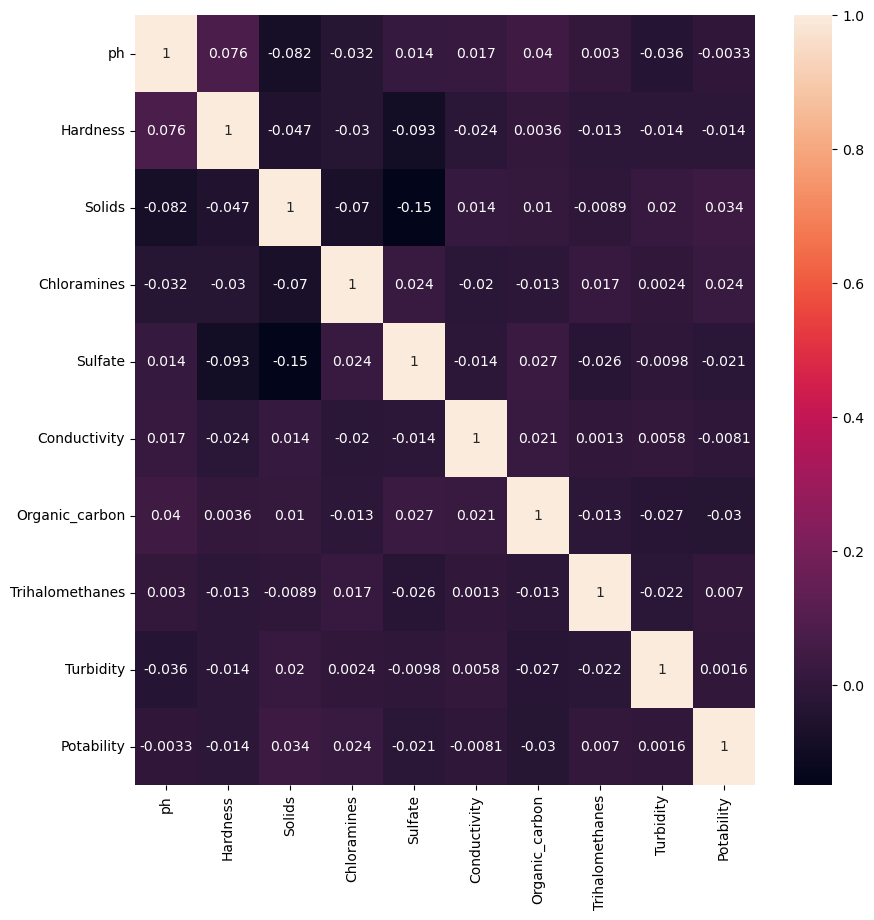

In [18]:
plt.figure(figsize=(10,10))
# create a heatmap to show the correlation
sns.heatmap(new_water.corr(), annot=True)
plt.show()

In [19]:
# new_water.hist(grid=False, edgecolor='black')

In [20]:
new_water.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [21]:
new_water.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

Text(0.5, 1.0, 'Potable water proportions')

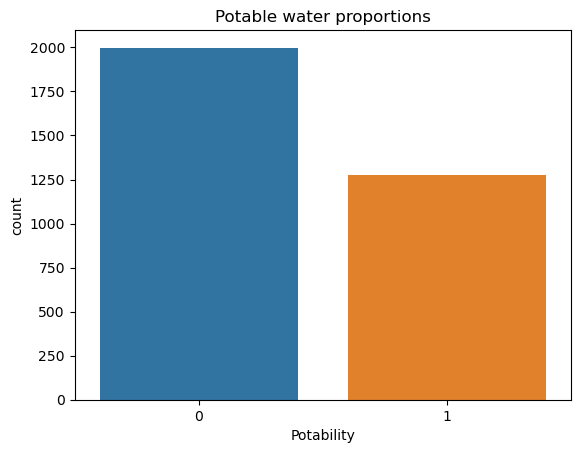

In [22]:
sns.countplot(data=new_water, x='Potability')
plt.title('Potable water proportions')


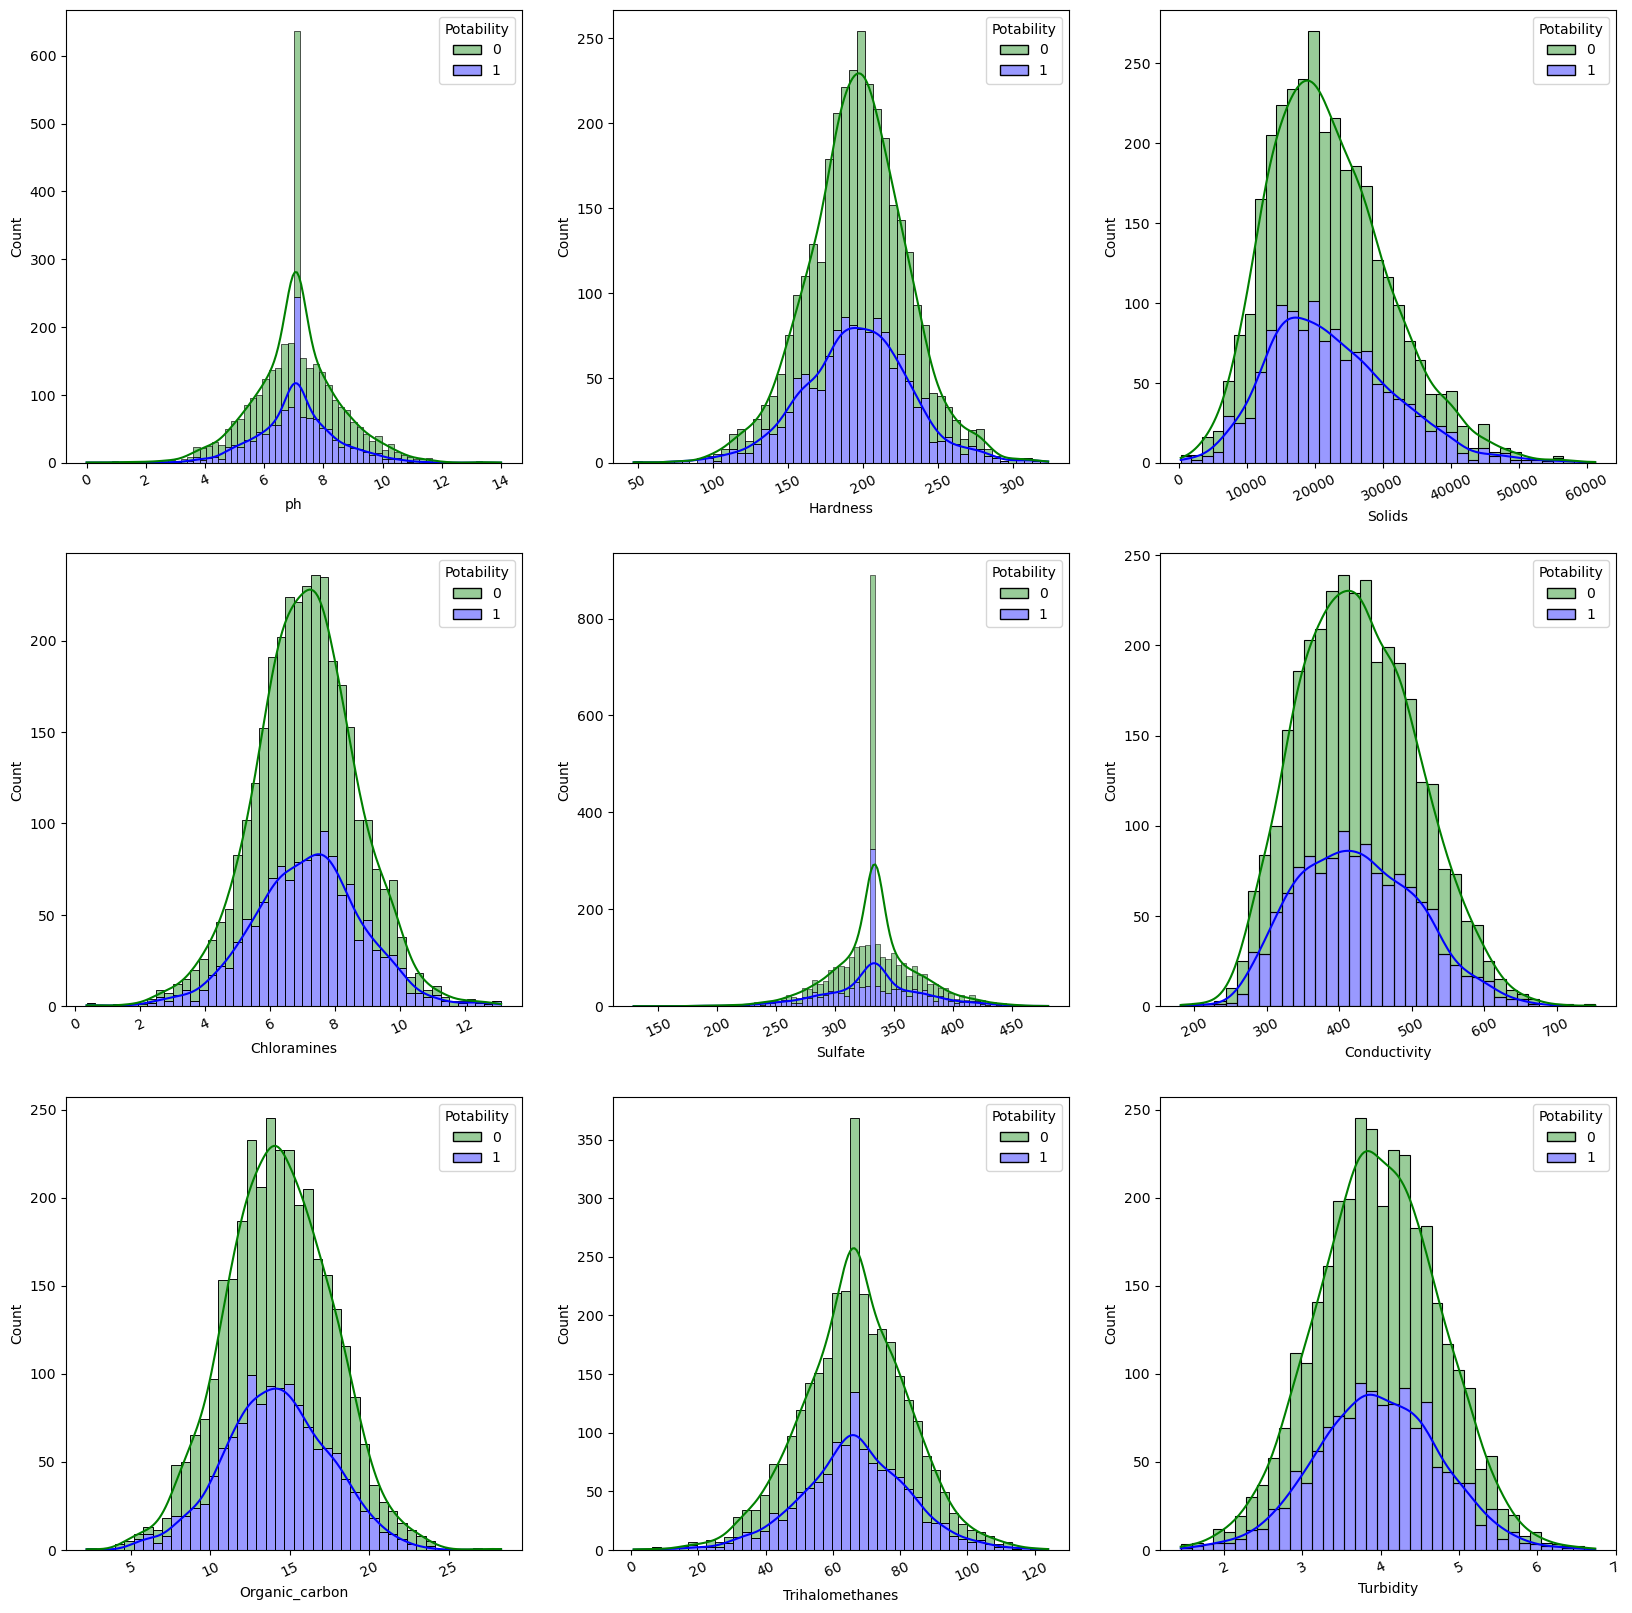

In [23]:
# histogram of the distribution of each feature in dataset

features = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon',
            'Trihalomethanes','Turbidity']
plt.figure(figsize=(20, 20))
plot_data = new_water.drop('Potability', axis=1)
for i in enumerate(features):
    plt.subplot(3, 3, i[0]+1)
    sns.histplot(
    data=plot_data,
    x=plot_data[i[1]],
    hue=new_water['Potability'],
    palette=['green', 'blue'],
    kde=True,
    multiple='stack',
    alpha=0.4)
    plt.xticks(rotation=25)

<Figure size 1000x1000 with 0 Axes>

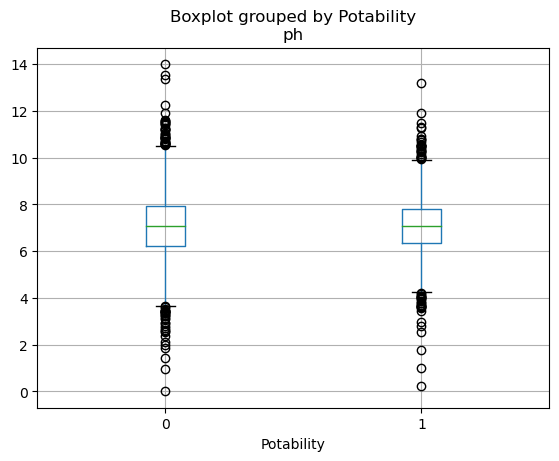

In [24]:
plt.figure(figsize=(10,10))
new_water.boxplot(column='ph', by='Potability', grid=True)
# plt.title('Comparison of Ph and Potability')
plt.show()

<Figure size 1000x1000 with 0 Axes>

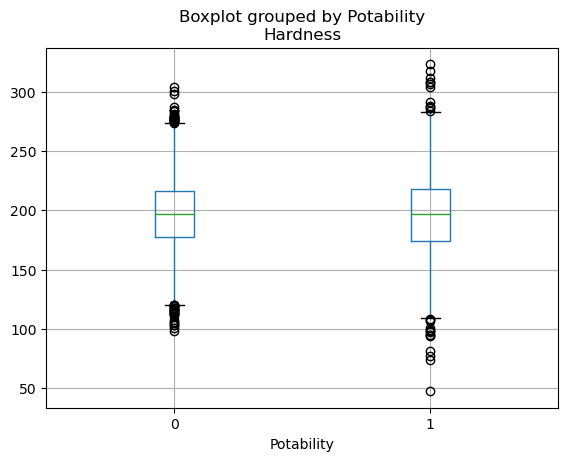

In [25]:
plt.figure(figsize=(10,10))
new_water.boxplot(column='Hardness', by='Potability', grid=True)
plt.show()

<Figure size 1000x1000 with 0 Axes>

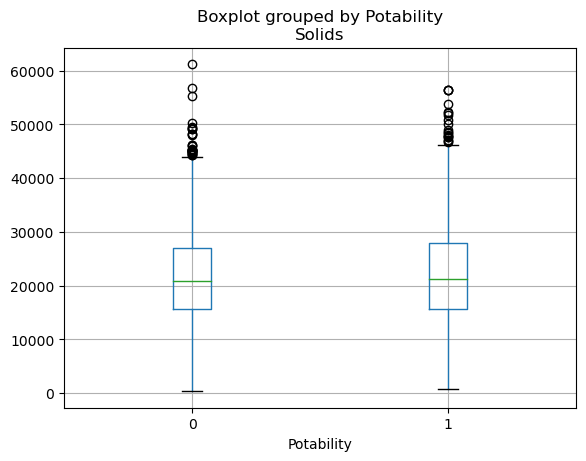

In [26]:
plt.figure(figsize=(10,10))
new_water.boxplot(column='Solids', by='Potability', grid=True)
plt.show()

<Figure size 1000x1000 with 0 Axes>

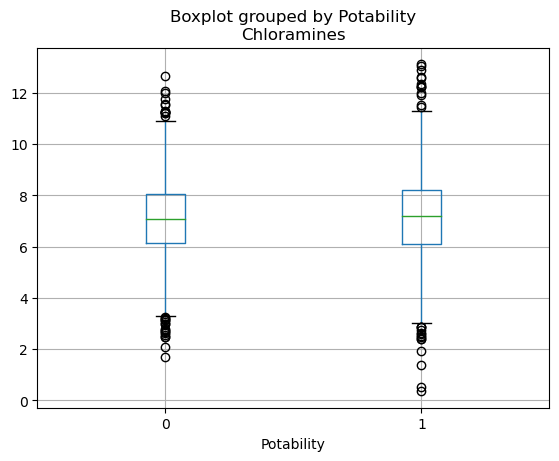

In [27]:
plt.figure(figsize=(10,10))
new_water.boxplot(column='Chloramines', by='Potability', grid=True)
plt.show()

<Figure size 1000x1000 with 0 Axes>

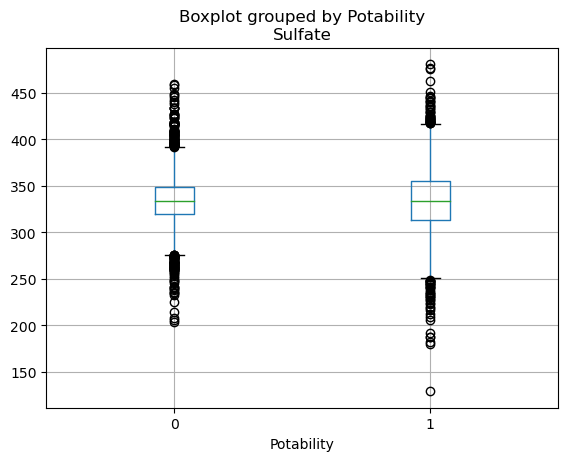

In [28]:
plt.figure(figsize=(10,10))
new_water.boxplot(column='Sulfate', by='Potability', grid=True)
plt.show()

<Figure size 1000x1000 with 0 Axes>

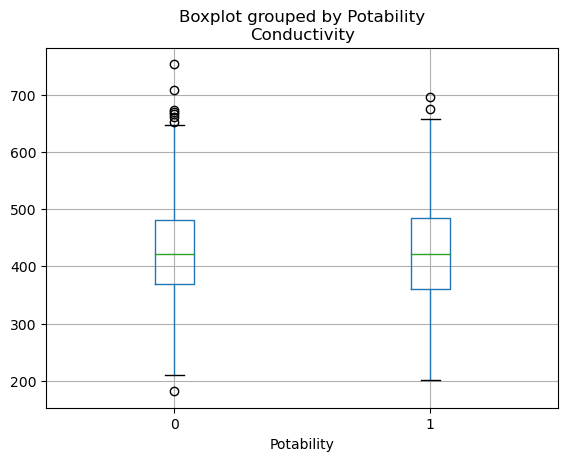

In [29]:
plt.figure(figsize=(10,10))
new_water.boxplot(column='Conductivity', by='Potability', grid=True)
plt.show()

<Figure size 1000x1000 with 0 Axes>

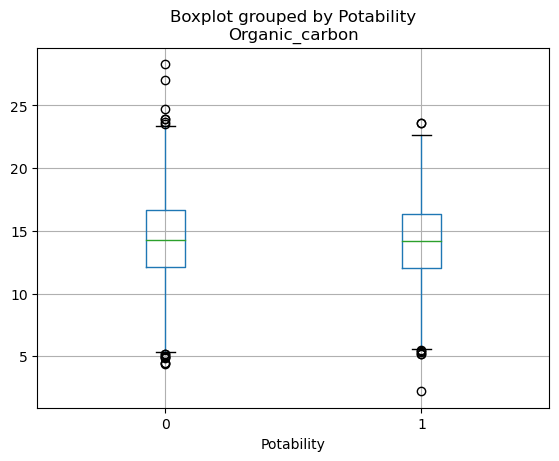

In [30]:
plt.figure(figsize=(10,10))
new_water.boxplot(column='Organic_carbon', by='Potability', grid=True)
plt.show()

<Figure size 1000x1000 with 0 Axes>

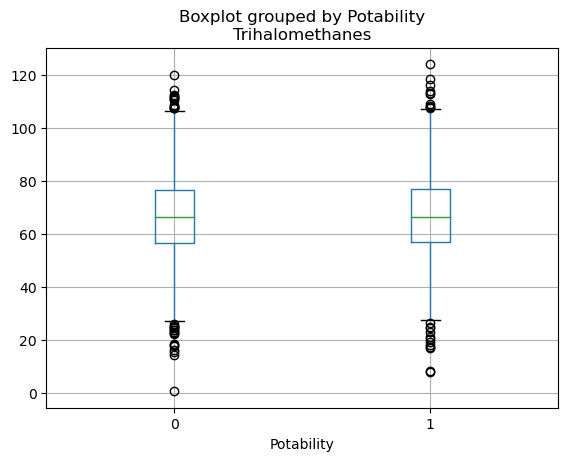

In [31]:
plt.figure(figsize=(10,10))
new_water.boxplot(column='Trihalomethanes', by='Potability', grid=True)
plt.show()

<Figure size 1000x1000 with 0 Axes>

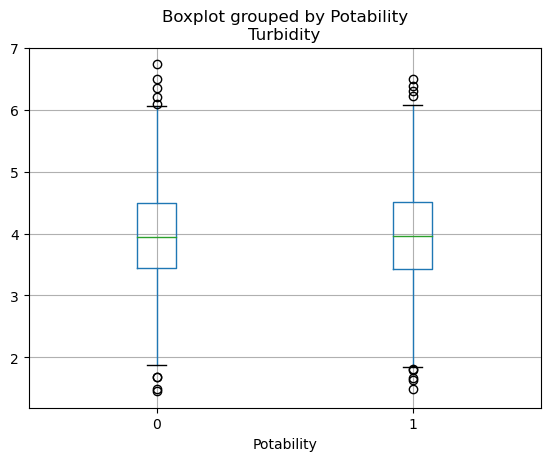

In [32]:
plt.figure(figsize=(10,10))
new_water.boxplot(column='Turbidity', by='Potability', grid=True)
plt.show()

## Second Dataset for Testing the Models
Pulled together lab_results.csv and field_results.csv to create one dataset with the same features as the Initial Training and Validation Dataset. <br>
dataset_2_water_potability.csv <br>
Karlee Radford wrote the code to pull together the features and get the subset for these datasets.

In [33]:
#import pandas as pd
df_lab = pd.read_csv(r"E:\Karlee\Documents\NMSU\Courses\CS519\group_project\datasets\lab_results.csv")
df_field = pd.read_csv(r"E:\Karlee\Documents\NMSU\Courses\CS519\group_project\datasets\field_results.csv",low_memory=False)

In [34]:
df = pd.concat([df_lab,df_field])

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5688734 entries, 0 to 1156370
Data columns (total 22 columns):
 #   Column              Dtype  
---  ------              -----  
 0   station_id          int64  
 1   station_name        object 
 2   full_station_name   object 
 3   station_number      object 
 4   station_type        object 
 5   latitude            float64
 6   longitude           float64
 7   status              object 
 8   county_name         object 
 9   sample_code         object 
 10  sample_date         object 
 11  sample_depth        float64
 12  sample_depth_units  object 
 13  parameter           object 
 14  result              float64
 15  reporting_limit     float64
 16  units               object 
 17  method_name         object 
 18  anl_data_type       object 
 19  fdr_text_result     object 
 20  fdr_date_result     object 
 21  fdr_footnote        object 
dtypes: float64(5), int64(1), object(16)
memory usage: 998.2+ MB


In [36]:
df.describe()

,station_id,latitude,longitude,sample_depth,result,reporting_limit
count,5.688734e+06,5.563659e+06,5.563659e+06,2.347437e+06,5.525553e+06,5.513060e+06
mean,1.583311e+04,3.710401e+01,1.196211e+02,5.937929e+00,3.154079e+02,6.748436e-01
std,1.723902e+04,2.375206e+00,1.369850e+01,3.656736e+01,4.208071e+03,1.030773e+01
min,1.000000e+00,3.254170e+01,-1.214820e+02,-3.500000e-01,-2.723000e+02,0.000000e+00
25%,1.726000e+03,3.451520e+01,1.187112e+02,3.000000e-01,4.000000e-01,1.000000e-01
50%,5.940000e+03,3.768100e+01,1.212277e+02,1.000000e+00,8.800000e+00,1.260000e-01
75%,2.966600e+04,3.882960e+01,1.217544e+02,1.000000e+00,7.380000e+01,1.000000e+00
max,4.792900e+04,4.203440e+01,1.244006e+02,1.210000e+03,5.000000e+06,1.000000e+04


In [37]:
df.describe(include=["object", "bool"])

,station_name,full_station_name,station_number,station_type,status,county_name,sample_code,sample_date,sample_depth_units,parameter,units,method_name,anl_data_type,fdr_text_result,fdr_date_result,fdr_footnote
count,5688734,5688734,5688734,5688734,5688734,5688734,5688734,5688734,5688734,5688734,5688734,5688734,132290,121629,3910,117278
unique,44054,47423,44213,3,2,58,370363,424321,3,489,52,344,5,2159,118,8290
top,H.O. Banks Headworks,Delta P.P. Headworks at H.O. Banks PP,KA000331,Surface Water,Review Status Unknown,Los Angeles,SA0312B0073,08/14/1951 00:00,Feet,pH,mg/L,EPA 170.1 (Field),Memo,*See Units Note,1899-12-30,",Whitney,LMT-8A,n/p"
freq,63754,63754,63754,3647766,5663529,554533,222,3166,4198442,390217,2457646,260554,111481,93254,2173,4756


Extract column values by using dataframe.loc[] property.

In [38]:
df.loc[df['sample_date']==df['sample_date'].unique()[0],'result'].iloc[0]

3480.0

In [39]:
j = 0
for i in df['sample_date'].unique():
    print(i)
    print(df.loc[df['sample_date']==i,('parameter','result','units')])
    if j == 3:
        break
    j = j + 1    
    #break

05/03/1967 09:00
                                      parameter  result              units
0                                   Conductance  3480.0              uS/cm
1                               Dissolved Boron     7.7               mg/L
2                             Dissolved Calcium    68.0               mg/L
3                            Dissolved Chloride   758.0               mg/L
4                           Dissolved Magnesium    59.0               mg/L
5                              Dissolved Sodium   510.0               mg/L
6                              Total Alkalinity   270.0      mg/L as CaCO3
7                                Total Hardness   412.0      mg/L as CaCO3
8                                            pH     8.0           pH Units
1915369                             Conductance    70.0              uS/cm
1915370  Dissolved Acid Hydrolyzable Phosphorus     0.1          mg/L as P
1915371                         Dissolved Boron     0.0               mg/L
1915372 

In [40]:
#from datetime import datetime

In [41]:
new_col = pd.to_datetime(df.sample_date).dt.strftime('%Y-%m-%d %H:%M:%S')

In [42]:
df['formatted_datetime'] = new_col

In [43]:
df_piv = pd.pivot_table(df,index='formatted_datetime',columns='parameter',values='result')

In [44]:
df_piv.describe()

parameter,(Aminomethyl)phosphonic acid,(Bottom) DissolvedOxygen,(Bottom) SpecificConductance,(Bottom) WaterTemperature,(Bottom)Chlorophyll Fluorescence,(Bottom)Turbidity,(Bottom)Water Depth at Station,(Bottom)pH,1% Light Depth,"1,1,1,2-Tetrachloroethane",...,"p,p'-DDE","p,p'-DDT",p-Xylene,pH,pH (w/time),"s,s,s-Tributyl Phosphorotrithioate (DEF)",sec-Butylbenzene,tert-Butylbenzene,"trans-1,2-Dichloroethene","trans-1,3-Dichloropropene"
count,231.0,1584.000000,1639.000000,1582.000000,1578.000000,1641.000000,15.000000,1641.000000,4025.000000,2783.0,...,1218.0,1219.0,606.000000,208811.000000,4.000000,1529.000000,2789.000000,2783.000000,2897.0,2783.0
mean,0.0,31.696768,11110.127175,16.596833,2.510323,25.291968,9.293333,7.670780,1.411549,0.0,...,0.0,0.0,0.001650,7.959879,8.755000,0.003355,0.001673,0.000350,0.0,0.0
std,0.0,20.572254,14357.600950,4.666070,1.898372,34.062882,2.178291,0.252516,0.587837,0.0,...,0.0,0.0,0.040622,28.295097,0.531068,0.054454,0.031673,0.013071,0.0,0.0
min,0.0,6.140000,74.670000,8.190000,-0.270000,0.000000,6.400000,6.620000,0.160000,0.0,...,0.0,0.0,0.000000,-0.180000,8.100000,0.000000,0.000000,0.000000,0.0,0.0
25%,0.0,8.947500,230.000000,12.380000,1.380000,6.100000,7.150000,7.510000,1.000000,0.0,...,0.0,0.0,0.000000,7.500000,8.482500,0.000000,0.000000,0.000000,0.0,0.0
50%,0.0,45.905000,1215.000000,16.645000,1.972500,15.100000,9.500000,7.690000,1.310000,0.0,...,0.0,0.0,0.000000,7.800000,8.785000,0.000000,0.000000,0.000000,0.0,0.0
75%,0.0,50.550000,20252.500000,20.540000,3.000000,30.300000,10.350000,7.840000,1.700000,0.0,...,0.0,0.0,0.000000,8.050000,9.057500,0.000000,0.000000,0.000000,0.0,0.0
max,0.0,70.610000,46258.000000,29.900000,22.830000,412.200000,13.400000,9.030000,5.610000,0.0,...,0.0,0.0,1.000000,6027.000000,9.350000,1.470000,0.800000,0.500000,0.0,0.0


In [45]:
parameters = ['pH','Total Hardness','Total Dissolved Solids','Dissolved Chloride',
              'Dissolved Sulfate','Conductance','Total Organic Carbon',
              'Trihalomethane Formation Potential (THMFP)','Turbidity']

In [46]:
df2 = df_piv[parameters]

In [47]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 237867 entries, 1903-03-23 00:00:00 to 2023-02-15 13:45:00
Data columns (total 9 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   pH                                          208811 non-null  float64
 1   Total Hardness                              100261 non-null  float64
 2   Total Dissolved Solids                      117363 non-null  float64
 3   Dissolved Chloride                          169162 non-null  float64
 4   Dissolved Sulfate                           116795 non-null  float64
 5   Conductance                                 162038 non-null  float64
 6   Total Organic Carbon                        21508 non-null   float64
 7   Trihalomethane Formation Potential (THMFP)  127 non-null     float64
 8   Turbidity                                   118002 non-null  float64
dtypes: float64(9)
memory usage: 18.1+ MB


In [48]:
j = 0
units = {}
for i in parameters:
    x = df.loc[df['parameter']==i,('parameter','units')].iloc[0]
    units.setdefault(x[0],x[1])

In [49]:
for k,v in units.items():
    print(k,":",v)

pH : pH Units
Total Hardness : mg/L as CaCO3
Total Dissolved Solids : mg/L at 180 °C
Dissolved Chloride : mg/L
Dissolved Sulfate : mg/L
Conductance : uS/cm
Total Organic Carbon : mg/L as C
Trihalomethane Formation Potential (THMFP) : ug/L
Turbidity : N.T.U.


In [50]:
drop_df = df2.dropna(axis=0,how='all')

In [51]:
drop_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 230820 entries, 1903-03-23 00:00:00 to 2023-02-15 13:45:00
Data columns (total 9 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   pH                                          208811 non-null  float64
 1   Total Hardness                              100261 non-null  float64
 2   Total Dissolved Solids                      117363 non-null  float64
 3   Dissolved Chloride                          169162 non-null  float64
 4   Dissolved Sulfate                           116795 non-null  float64
 5   Conductance                                 162038 non-null  float64
 6   Total Organic Carbon                        21508 non-null   float64
 7   Trihalomethane Formation Potential (THMFP)  127 non-null     float64
 8   Turbidity                                   118002 non-null  float64
dtypes: float64(9)
memory usage: 17.6+ MB


In [52]:
drop_df.median(axis=0)

parameter
pH                                              7.80
Total Hardness                                144.00
Total Dissolved Solids                        289.00
Dissolved Chloride                             34.00
Dissolved Sulfate                              41.00
Conductance                                   468.00
Total Organic Carbon                            3.20
Trihalomethane Formation Potential (THMFP)    240.00
Turbidity                                       8.22
dtype: float64

In [53]:
df_filled = drop_df.fillna(drop_df.median())

In [54]:
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 230820 entries, 1903-03-23 00:00:00 to 2023-02-15 13:45:00
Data columns (total 9 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   pH                                          230820 non-null  float64
 1   Total Hardness                              230820 non-null  float64
 2   Total Dissolved Solids                      230820 non-null  float64
 3   Dissolved Chloride                          230820 non-null  float64
 4   Dissolved Sulfate                           230820 non-null  float64
 5   Conductance                                 230820 non-null  float64
 6   Total Organic Carbon                        230820 non-null  float64
 7   Trihalomethane Formation Potential (THMFP)  230820 non-null  float64
 8   Turbidity                                   230820 non-null  float64
dtypes: float64(9)
memory usage: 17.6+ MB


In [55]:
df_filled.describe() # filled with median

parameter,pH,Total Hardness,Total Dissolved Solids,Dissolved Chloride,Dissolved Sulfate,Conductance,Total Organic Carbon,Trihalomethane Formation Potential (THMFP),Turbidity
count,230820.000000,230820.000000,230820.000000,230820.000000,230820.000000,230820.000000,230820.000000,230820.000000,230820.000000
mean,7.944634,215.975573,772.793560,274.306677,171.155125,1283.640094,3.469260,240.054039,21.135606
std,26.912355,497.613565,3022.964069,1536.324404,863.197163,4391.233260,6.829067,8.402395,2084.067124
min,-0.180000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,-3.200000
25%,7.500000,144.000000,282.000000,14.000000,40.000000,307.500000,3.200000,240.000000,8.000000
50%,7.800000,144.000000,289.000000,34.000000,41.000000,468.000000,3.200000,240.000000,8.220000
75%,8.000000,144.000000,295.000000,69.000000,42.000000,711.000000,3.200000,240.000000,9.000000
max,6027.000000,50604.000000,245534.000000,79000.000000,49300.000000,408000.000000,600.000000,3400.000000,999999.000000


**EPA Standards:**

**pH:** 6.5 - 8.5
https://www.epa.gov/sites/default/files/2016-06/documents/npwdr_complete_table.pdf

**Hardness:** Not regulated by the EPA

**Solids:** < 500 mg/L
https://www.epa.gov/sites/default/files/2016-06/documents/npwdr_complete_table.pdf

**Chloramines:** < 26.0 mg/L
https://www.epa.gov/sites/default/files/2015-08/documents/method_300-0_rev_2-1_1993.pdf

**Sulfate:** < 250 mg/L
https://www.epa.gov/sites/default/files/2016-06/documents/npwdr_complete_table.pdf

**Conductivity:** Very dependent on body of water.
https://www.epa.gov/national-aquatic-resource-surveys/indicators-conductivity
Kaggle: < 400 uS/cm
https://www.kaggle.com/datasets/adityakadiwal/water-potability

**Organic_carbon:** < 2 mg/L
https://19january2017snapshot.epa.gov/sites/production/files/2015-06/documents/415_1dqi.pdf

**Trihalomethanes**: < 0.080 mg/L (or 0.080 ppm) or (80 ug/L)
https://www.epa.gov/ground-water-and-drinking-water/national-primary-drinking-water-regulations
https://www.epa.gov/sites/default/files/2015-06/documents/epa-524.2.pdf
    ^ sum 4 individual together so 80 * 4 = 320

**Turbidity:** < 40 NTU (Nephelometric Turbididty Unit)
https://www.epa.gov/sites/default/files/2015-08/documents/method_180-1_1993.pdf


**Potability**
If any parameter outside of range then water is not potable (0) and if all parameters are in range then it is potable (1).

In [56]:
# fixing class label based on feature limits set above.
def add_class_label(row):
    class_label = 1
    if row['pH'] < 6.5 and row['pH'] > 8.5:
        class_label = 0
    if row['Total Dissolved Solids'] > 500.0:
        class_label = 0
    if row['Dissolved Chloride'] > 26.0:
        class_label = 0
    if row['Dissolved Sulfate'] > 250.0:
        class_label = 0
    if row['Conductance'] > 400.0:
        class_label = 0
    if row['Total Organic Carbon'] > 2.0: # 2 gives 341 1's but 4.0 gives 44603 1's
        class_label = 0
    if row['Trihalomethane Formation Potential (THMFP)'] > 320:
        class_label = 0
    if row['Turbidity'] > 40.0:
        class_label = 0
    return class_label

In [57]:
# add class labels based on EPA requirements.
df_filled['potability'] = df_filled.apply(lambda row: add_class_label(row), axis=1)

In [58]:
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 230820 entries, 1903-03-23 00:00:00 to 2023-02-15 13:45:00
Data columns (total 10 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   pH                                          230820 non-null  float64
 1   Total Hardness                              230820 non-null  float64
 2   Total Dissolved Solids                      230820 non-null  float64
 3   Dissolved Chloride                          230820 non-null  float64
 4   Dissolved Sulfate                           230820 non-null  float64
 5   Conductance                                 230820 non-null  float64
 6   Total Organic Carbon                        230820 non-null  float64
 7   Trihalomethane Formation Potential (THMFP)  230820 non-null  float64
 8   Turbidity                                   230820 non-null  float64
 9   potability                                  

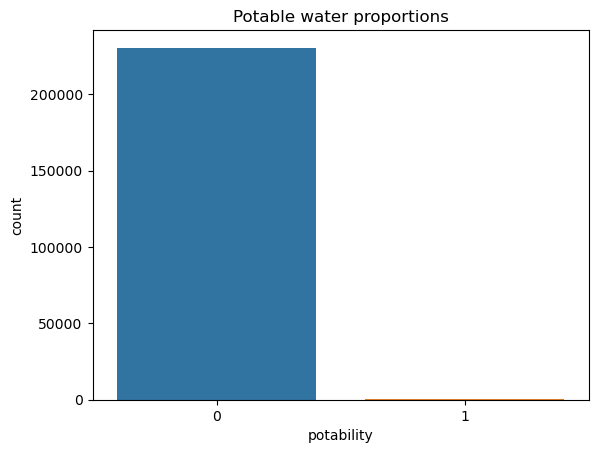

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df_filled, x='potability')
plt.title('Potable water proportions')
plt.show()

In [60]:
df_filled['potability'].value_counts()

0    230479
1       341
Name: potability, dtype: int64

In [61]:
# create a csv file for others to use on their models.
df_filled.to_csv('dataset_2_water_potability.csv',index=False)

Second dataset EDA by Jamira and Karlee

combined histograms to show distributions of features:

In [68]:
#Need to subsample class 0

subsample0 = df_filled[df_filled['potability']==0].sample(3000)
subsample1 = df_filled[df_filled['potability']==1]

subsample = pd.concat([subsample0,subsample1])
#print(subsample)


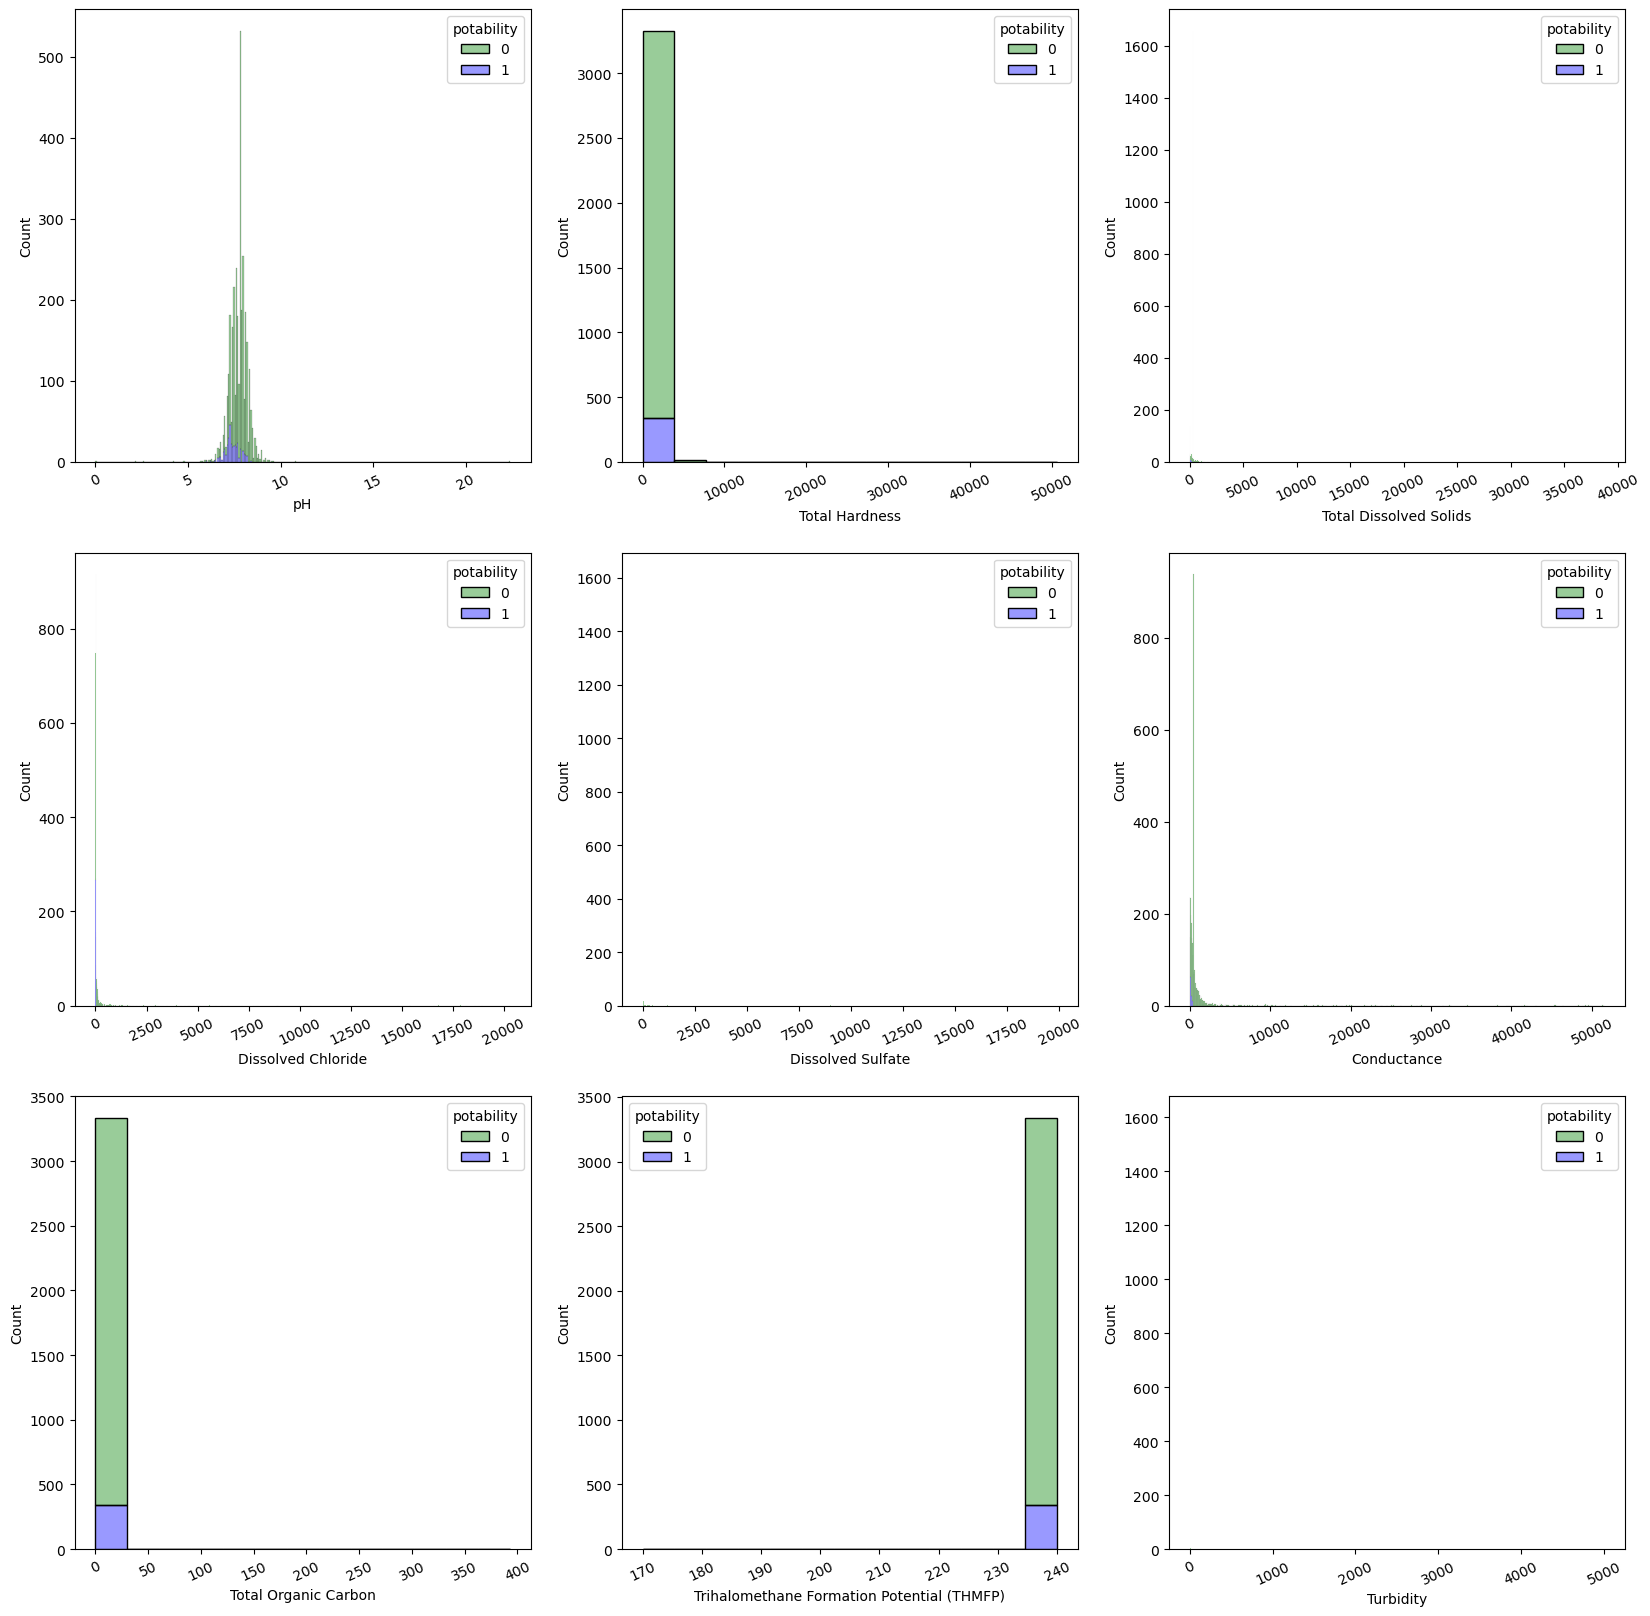

In [69]:
# used a subsample to not make these figures take too long to make
# still takes a few minutes on my computer at 3000 samples
plt.figure(figsize=(20, 20))
plot_data = subsample.drop('potability', axis=1)
for i in enumerate(parameters):
    plt.subplot(3, 3, i[0]+1)
    sns.histplot(
    data=plot_data,
    x=plot_data[i[1]],
    hue=subsample['potability'],
    palette=['green', 'blue'],
    #kde=True,
    multiple='stack',
    alpha=0.4)
    plt.xticks(rotation=25)

Heatmap to show correlation

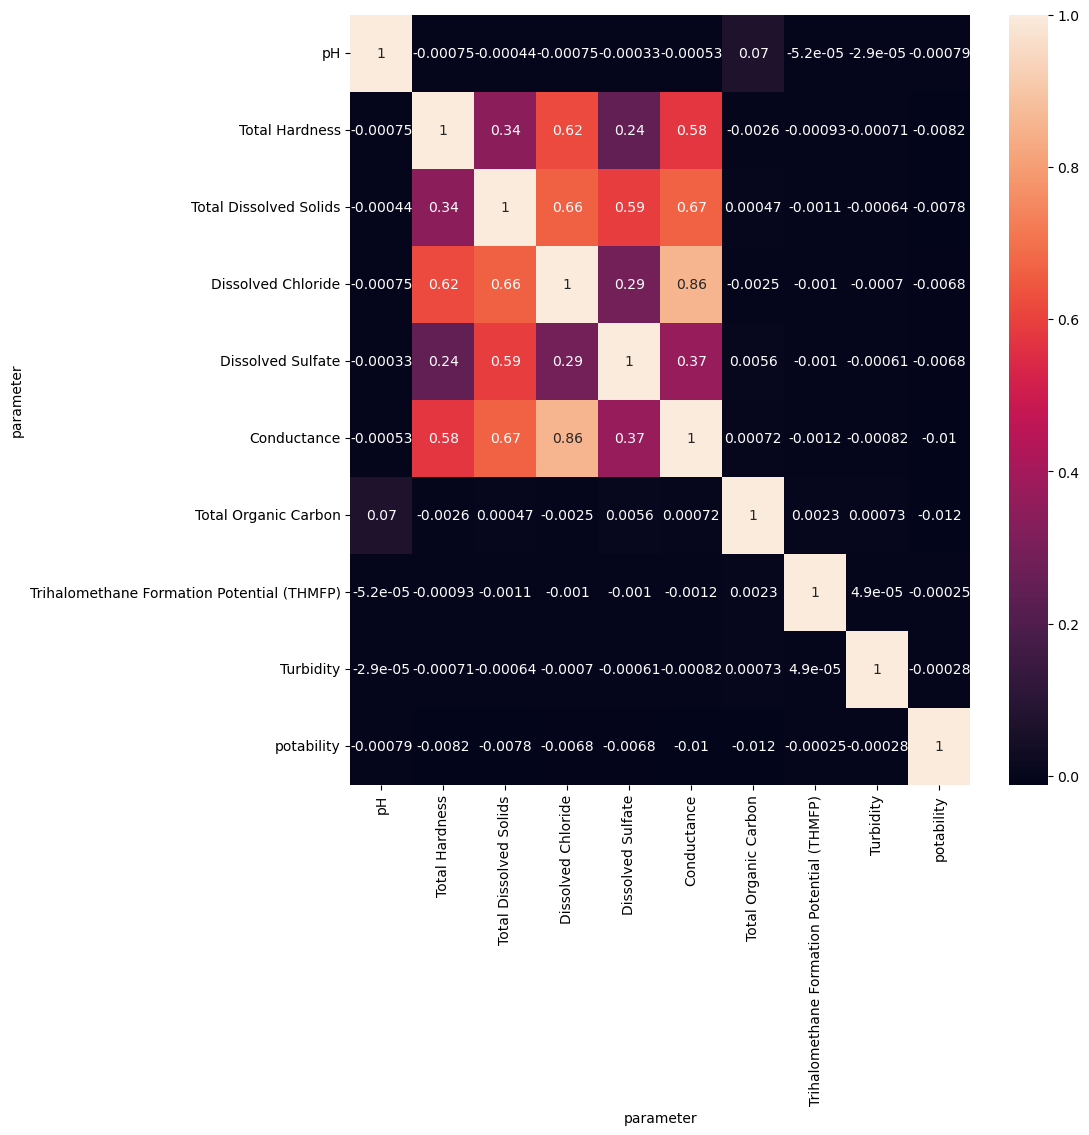

In [64]:
plt.figure(figsize=(10,10))
# create a heatmap to show the correlation
sns.heatmap(df_filled.corr(), annot=True)
plt.show()

Correlation matrix

Summary statistics:


In [65]:
df_filled.describe()

parameter,pH,Total Hardness,Total Dissolved Solids,Dissolved Chloride,Dissolved Sulfate,Conductance,Total Organic Carbon,Trihalomethane Formation Potential (THMFP),Turbidity,potability
count,230820.000000,230820.000000,230820.000000,230820.000000,230820.000000,230820.000000,230820.000000,230820.000000,230820.000000,230820.000000
mean,7.944634,215.975573,772.793560,274.306677,171.155125,1283.640094,3.469260,240.054039,21.135606,0.001477
std,26.912355,497.613565,3022.964069,1536.324404,863.197163,4391.233260,6.829067,8.402395,2084.067124,0.038408
min,-0.180000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,-3.200000,0.000000
25%,7.500000,144.000000,282.000000,14.000000,40.000000,307.500000,3.200000,240.000000,8.000000,0.000000
50%,7.800000,144.000000,289.000000,34.000000,41.000000,468.000000,3.200000,240.000000,8.220000,0.000000
75%,8.000000,144.000000,295.000000,69.000000,42.000000,711.000000,3.200000,240.000000,9.000000,0.000000
max,6027.000000,50604.000000,245534.000000,79000.000000,49300.000000,408000.000000,600.000000,3400.000000,999999.000000,1.000000


(0, 'pH')
(1, 'Total Hardness')
(2, 'Total Dissolved Solids')
(3, 'Dissolved Chloride')
(4, 'Dissolved Sulfate')
(5, 'Conductance')
(6, 'Total Organic Carbon')
(7, 'Trihalomethane Formation Potential (THMFP)')
(8, 'Turbidity')


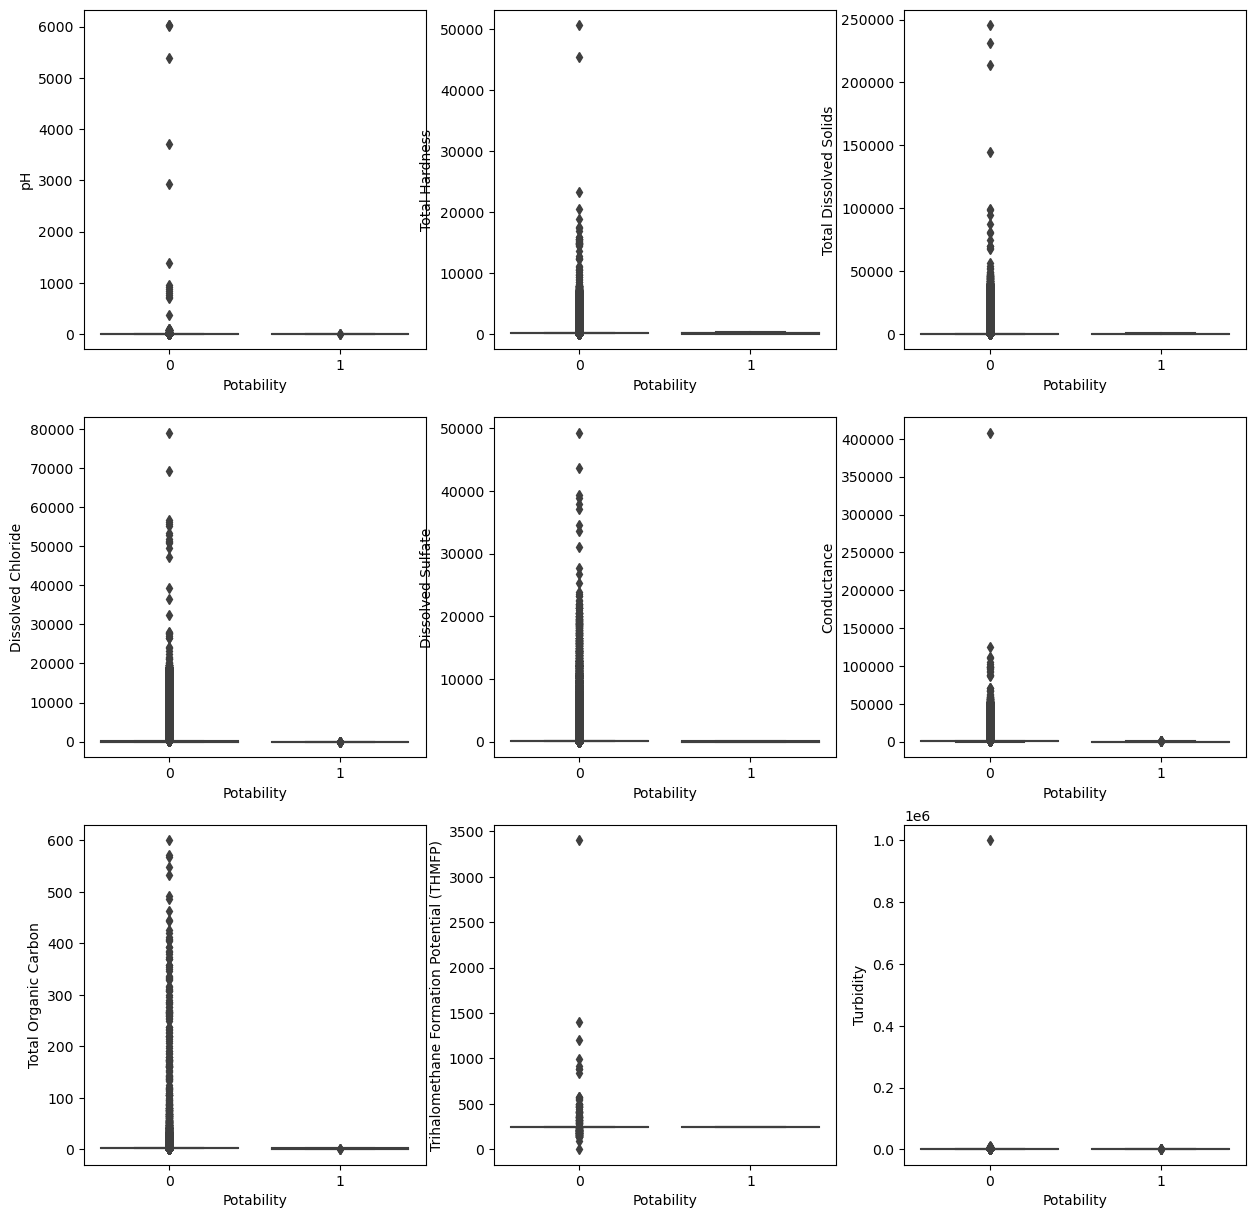

In [66]:
plt.figure(figsize=(15, 15))
for i in enumerate(parameters):
    print(i)
    plt.subplot(3, 3, i[0]+1)
    sns.boxplot(y=df_filled[i[1]],x=df_filled['potability']).set(xlabel='Potability',ylabel=i[1])
plt.show()

(0, 'pH')
(1, 'Total Hardness')
(2, 'Total Dissolved Solids')
(3, 'Dissolved Chloride')
(4, 'Dissolved Sulfate')
(5, 'Conductance')
(6, 'Total Organic Carbon')
(7, 'Trihalomethane Formation Potential (THMFP)')
(8, 'Turbidity')


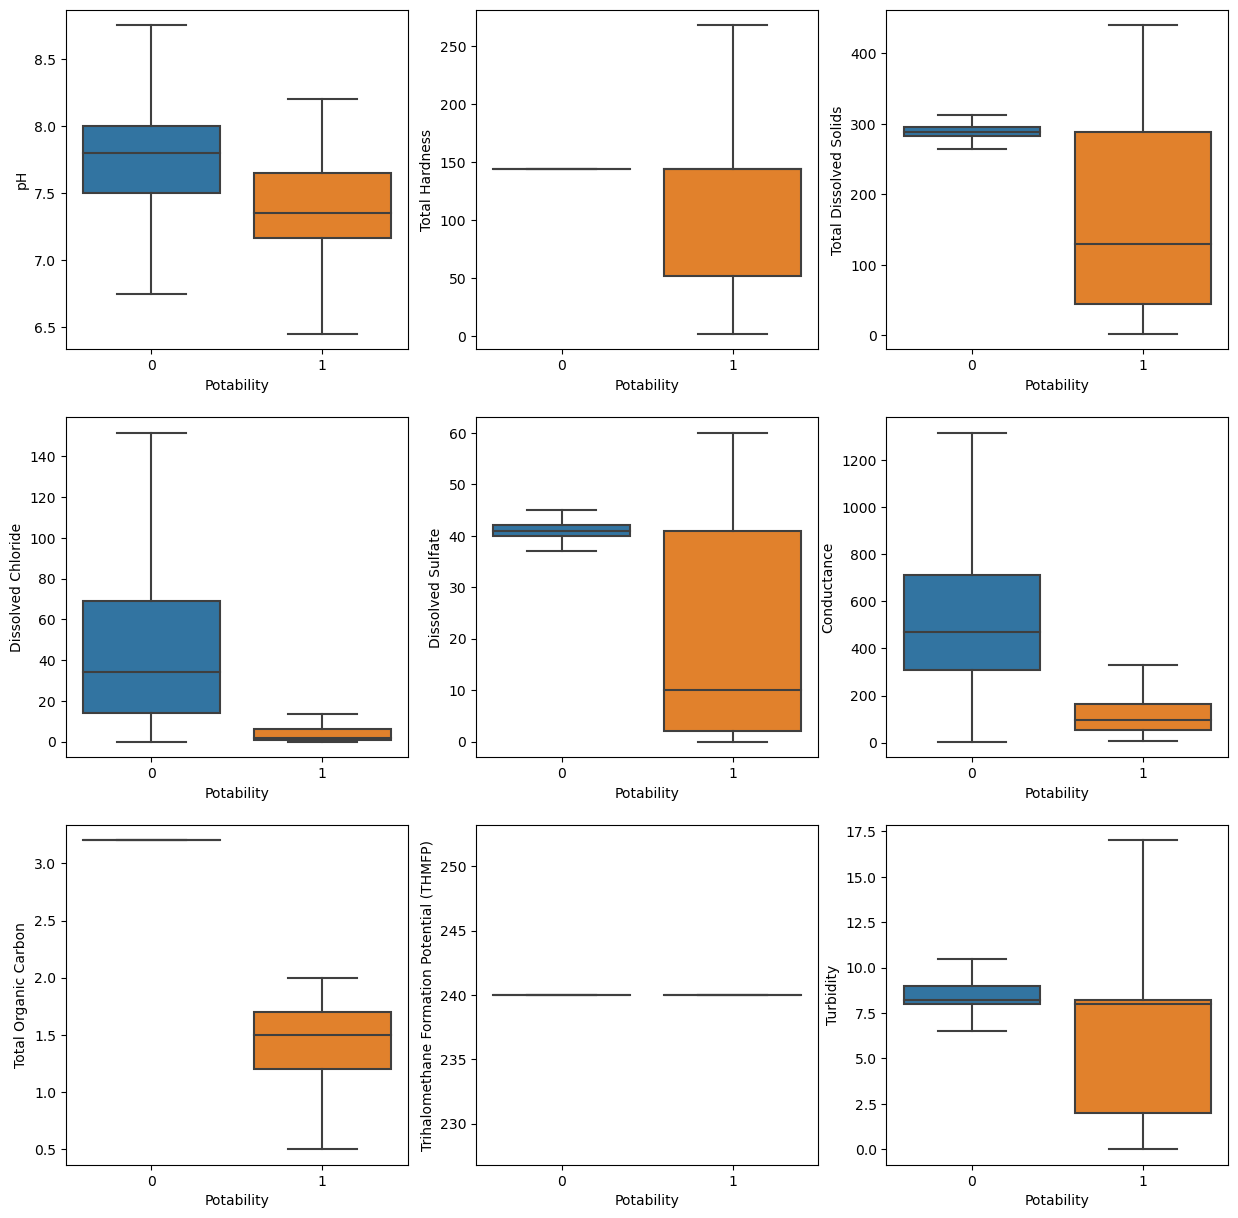

In [67]:
# lets see how they look without outliers
plt.figure(figsize=(15, 15))
for i in enumerate(parameters):
    print(i)
    plt.subplot(3, 3, i[0]+1)
    sns.boxplot(y=df_filled[i[1]],x=df_filled['potability'],showfliers=False).set(xlabel='Potability',ylabel=i[1])
plt.show()